In [310]:
%reload_ext nb_black

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from ipywidgets import interact

from sklearn.cluster import (
    KMeans,
    DBSCAN,
    AgglomerativeClustering,
    AffinityPropagation,
    MeanShift,
)

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from scipy.cluster.hierarchy import dendrogram, linkage

try:
    import prince
except ModuleNotFoundError:
    !pip install prince
    import prince

# pd.set_option("display.max_columns", None)
# pd.set_option("display.max_rows", None)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [194]:
# filepath = "C:/Users/jlim7/OneDrive/Documents/GitHub/New-York-Bust-Clustering/datafiles/mta_1710.csv"
filepath = "mta_1710.csv"
# nyc = pd.read_csv(filepath, error_bad_lines=False)
# nyc.to_csv("mta_1710.csv", index=False)
nyc = pd.read_csv(filepath)

# help with speed up executing code, comment out later
nyc = nyc.sample(100000)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [195]:
nyc.head(20)

RecordedAtTime  DirectionRef PublishedLineName  \
6181912  2017-10-28 17:58:33             1          Bx12-SBS   
6858747  2017-10-31 22:38:40             1               M15   
627751   2017-10-03 21:08:51             0              M14D   
3625344  2017-10-17 14:27:11             0               B48   
2579331  2017-10-12 15:47:10             1                M3   
6291330  2017-10-29 13:30:11             1               Q36   
678165   2017-10-04 07:19:03             1               M72   
1943693  2017-10-10 06:03:48             1               M31   
861280   2017-10-04 19:44:12             1               Q85   
466155   2017-10-03 09:37:48             1               B61   
6004302  2017-10-27 18:25:07             0               B54   
6158929  2017-10-28 15:47:30             1               Bx1   
1063261  2017-10-05 16:35:08             0              BxM1   
5365337  2017-10-25 08:51:49             1               Q54   
6693357  2017-10-31 09:57:03             1              Bx35   
5067180  2017-10-24 05:59:30             1                Q3   
5912408  2017-10-27 12:34:33             1                B8   
4622681  2017-10-21 18:55:15             1              Bx35   
1310071  2017-10-06 16:18:16             1           M34-SBS   
313518   2017-10-02 16:56:47             1               M50   

                        OriginName  OriginLat  OriginLong  \
6181912     PARKING RAMP/ACCESS RD  40.865989  -73.827298   
6858747              E 126 ST/2 AV  40.803230  -73.932451   
627751               11 AV/W 17 ST  40.744841  -74.008147   
3625344     LINCOLN RD/FLATBUSH AV  40.660662  -73.962371   
2579331                        NaN        NaN         NaN   
6291330          256 ST/JAMAICA AV  40.727774  -73.708690   
678165             E 72 ST/YORK AV  40.766950  -73.954116   
1943693            E 92 ST/YORK AV  40.779755  -73.944535   
861280               243 ST/147 AV  40.657737  -73.741214   
466155          SMITH ST/FULTON ST  40.691209  -73.987376   
6004302          JAY ST/MYRTLE PLZ  40.694503  -73.987123   
6158929      RIVERDALE AV/W 231 ST  40.881188  -73.909336   
1063261                        NaN        NaN         NaN   
5365337          JAMAICA AV/170 ST  40.707288  -73.789580   
6693357  W FARMS RD/WESTCHESTER AV  40.824986  -73.891499   
5067180            165 ST/TERMINAL  40.707557  -73.795502   
5912408     ROCKAWAY AV/HEGEMAN AV  40.655904  -73.907318   
4622681  W FARMS RD/WESTCHESTER AV  40.824986  -73.891499   
1310071      WATERSIDE/WATERSIDE 1  40.737993  -73.973405   
313518                E 49 ST/1 AV  40.753508  -73.966967   

                                 DestinationName  DestinationLat  \
6181912               SELECT BUS BROADWAY INWOOD       40.867787   
6858747                     SOUTH FERRY via 2 AV       40.701609   
627751       LOWER E. SIDE DELANCY-FDR CROSSTOWN       40.716391   
3625344                     GREENPOINT MEEKER AV       40.726636   
2579331               EAST VILLAGE 8 ST via 5 AV       40.730039   
6291330                      JAMAICA 165 ST TERM       40.707614   
678165                WEST SIDE FREEDOM PL XTOWN       40.776491   
1943693                  CLINTON 11 AV via 57 ST       40.768191   
861280                     JAMAICA PRSNS - ARCHR       40.701681   
466155             PARK SLOPE 20 ST via RED HOOK       40.657574   
6004302                RIDGEWOOD TERM via MYRTLE       40.700528   
6158929      LTD MOTT HAVEN 136 ST via CONCOURSE       40.809653   
1063261       RIVERDALE 263 ST via H HUDSON PKWY             NaN   
5365337                   WILLAMSBURG BRIDGE PLZ       40.709478   
6693357                 WASHINGTON HTS GW BRIDGE       40.848943   
5067180               JFK AIRPORT via FARMERS BL       40.647137   
5912408                      BAY RIDGE 95 ST STA       40.616262   
4622681                 WASHINGTON HTS GW BRIDGE       40.848943   
1310071  SELECT BUS JAVITS CTR - 12 AV CROSSTOWN       40.756670   
313518            WEST SIDE

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [196]:
nyc.shape

(100000, 17)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [197]:
@interact
def do_stuff_interactively(
    text="text input",
    select=["option 1", "option2"],
    num=5,
    num_range=(3, 8),
    bool_tf=True,
):
    """
    * Name the function whatever you want
    * Name the arguments whatever you want
    * @interact chooses an appropriate widget based on default args
    * Do whatever you want in the function code
    * Function will be rerun every time the input changes
    """
    print("^Above widgets auto-generated by `@interact`")
    print("\n----------------------------\n")
    print("Below are the outputs of the function:\n")

    print(f"text: {text}")
    print(f"select: {select}")
    print(f"num: {num}")
    print(f"num_range: {num_range}")
    print(f"bool_tf: {bool_tf}")

interactive(children=(Text(value='text input', description='text'), Dropdown(description='select', options=('o…

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Data Cleaning

#### Checking for missing values and filling in NANs

In [198]:
# Expected Arrival Time has around 16% missing rows,
# I plan to fill with forward fill.
nyc.isna().mean()

RecordedAtTime               0.00000
DirectionRef                 0.00000
PublishedLineName            0.00000
OriginName                   0.00914
OriginLat                    0.00914
OriginLong                   0.00914
DestinationName              0.00000
DestinationLat               0.00135
DestinationLong              0.00135
VehicleRef                   0.00000
VehicleLocation.Latitude     0.00000
VehicleLocation.Longitude    0.00000
NextStopPointName            0.00104
ArrivalProximityText         0.00104
DistanceFromStop             0.00104
ExpectedArrivalTime          0.16202
ScheduledArrivalTime         0.02250
dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [199]:
# first I examine the missing data and see if there are any noticeable patterns
nyc.loc[nyc.isnull().any(axis=1)].head()

RecordedAtTime  DirectionRef PublishedLineName  \
2579331  2017-10-12 15:47:10             1                M3   
6291330  2017-10-29 13:30:11             1               Q36   
861280   2017-10-04 19:44:12             1               Q85   
1063261  2017-10-05 16:35:08             0              BxM1   
2570014  2017-10-12 15:07:34             1               B82   

                         OriginName  OriginLat  OriginLong  \
2579331                         NaN        NaN         NaN   
6291330           256 ST/JAMAICA AV  40.727774  -73.708690   
861280                243 ST/147 AV  40.657737  -73.741214   
1063261                         NaN        NaN         NaN   
2570014  SEAVIEW AV/PENNSYLVANIA AV  40.642980  -73.878336   

                                  DestinationName  DestinationLat  \
2579331                EAST VILLAGE 8 ST via 5 AV       40.730039   
6291330                       JAMAICA 165 ST TERM       40.707614   
861280                      JAMAICA PRSNS - ARCHR       40.701681   
1063261        RIVERDALE 263 ST via H HUDSON PKWY             NaN   
2570014  CONEY ISLAND via FLATLANDS via KINGS HWY       40.576973   

         DestinationLong  VehicleRef  VehicleLocation.Latitude  \
2579331       -73.991312   NYCT_6686                 40.730118   
6291330       -73.795538   NYCT_8495                 40.713472   
861280        -73.802477   NYCT_8436                 40.704851   
1063261              NaN  MTABC_3098                 40.780593   
2570014       -73.981396   NYCT_4822                 40.599369   

         VehicleLocation.Longitude    NextStopPointName ArrivalProximityText  \
2579331                 -73.991257  E 8 ST/LAFAYETTE ST              at stop   
6291330                 -73.780405  HILLSIDE AV/AVON ST              at stop   
861280                  -73.791651     ARCHER AV/165 ST        < 1 stop away   
1063261                 -73.952687         3 AV/E 91 ST        < 1 stop away   
2570014                 -73.996488       BAY PY/BATH AV          approaching   

         DistanceFromStop ExpectedArrivalTime ScheduledArrivalTime  
2579331               0.0                 NaN                  NaN  
6291330               0.0                 NaN             13:28:54  
861280              167.0                 NaN             19:33:25  
1063261             213.0                 NaN                  NaN  
2570014             102.0                 NaN             15:07:59

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [200]:
# forward fill missing rows
nyc = nyc.fillna(method="ffill")
nyc.head()

RecordedAtTime  DirectionRef PublishedLineName  \
6181912  2017-10-28 17:58:33             1          Bx12-SBS   
6858747  2017-10-31 22:38:40             1               M15   
627751   2017-10-03 21:08:51             0              M14D   
3625344  2017-10-17 14:27:11             0               B48   
2579331  2017-10-12 15:47:10             1                M3   

                     OriginName  OriginLat  OriginLong  \
6181912  PARKING RAMP/ACCESS RD  40.865989  -73.827298   
6858747           E 126 ST/2 AV  40.803230  -73.932451   
627751            11 AV/W 17 ST  40.744841  -74.008147   
3625344  LINCOLN RD/FLATBUSH AV  40.660662  -73.962371   
2579331  LINCOLN RD/FLATBUSH AV  40.660662  -73.962371   

                             DestinationName  DestinationLat  DestinationLong  \
6181912           SELECT BUS BROADWAY INWOOD       40.867787       -73.920551   
6858747                 SOUTH FERRY via 2 AV       40.701609       -74.012226   
627751   LOWER E. SIDE DELANCY-FDR CROSSTOWN       40.716391       -73.980131   
3625344                 GREENPOINT MEEKER AV       40.726636       -73.934326   
2579331           EAST VILLAGE 8 ST via 5 AV       40.730039       -73.991312   

        VehicleRef  VehicleLocation.Latitude  VehicleLocation.Longitude  \
6181912  NYCT_5771                 40.857780                 -73.843890   
6858747  NYCT_6035                 40.724081                 -73.990974   
627751   NYCT_5898                 40.744800                 -74.006757   
3625344  NYCT_7198                 40.726679                 -73.934379   
2579331  NYCT_6686                 40.730118                 -73.991257   

                  NextStopPointName ArrivalProximityText  DistanceFromStop  \
6181912  PELHAM PKWY/EASTCHESTER RD              at stop              24.0   
6858747     E HOUSTON ST/FORSYTH ST          approaching             116.0   
627751              W 18 ST / 10 AV          approaching              86.0   
3625344        MEEKER AV/STEWART AV              at stop               0.0   
2579331         E 8 ST/LAFAYETTE ST              at stop               0.0   

         ExpectedArrivalTime ScheduledArrivalTime  
6181912  2017-10-28 17:58:52             17:29:34  
6858747  2017-10-31 22:39:47             22:30:27  
627751   2017-10-03 21:09:16             21:10:00  
3625344  2017-10-17 14:27:20             14:17:00  
2579331  2017-10-17 14:27:20             14:17:00

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [201]:
nyc.isna().mean()

RecordedAtTime               0.0
DirectionRef                 0.0
PublishedLineName            0.0
OriginName                   0.0
OriginLat                    0.0
OriginLong                   0.0
DestinationName              0.0
DestinationLat               0.0
DestinationLong              0.0
VehicleRef                   0.0
VehicleLocation.Latitude     0.0
VehicleLocation.Longitude    0.0
NextStopPointName            0.0
ArrivalProximityText         0.0
DistanceFromStop             0.0
ExpectedArrivalTime          0.0
ScheduledArrivalTime         0.0
dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Checking for values with insufficient amount of information

In [202]:
nyc["DirectionRef"].value_counts()

0    50060
1    49940
Name: DirectionRef, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [203]:
nyc["PublishedLineName"].value_counts()

B6         1821
B41        1482
Q58        1461
Q44-SBS    1333
B35        1280
           ... 
Q101          1
BxM18         1
Q112          1
Q9            1
Q103          1
Name: PublishedLineName, Length: 302, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [204]:
# get rid of values in published line name with less than 100 values.
count = nyc["PublishedLineName"].value_counts()
keep = count[count > 100].index
nyc = nyc[nyc["PublishedLineName"].isin(keep)]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [205]:
nyc["OriginName"].value_counts()

MERRICK BL/ARCHER AV           1410
E 126 ST/2 AV                  1387
W 179 ST/BROADWAY              1252
138 ST/37 AV                    990
HARWAY AV/BAY 37 ST             983
                               ... 
MERRILL AV / RICHMOND AV          1
VICTORY BL/FOREST AV              1
12 AV/ 80 ST                      1
86 ST/25 AV                       1
NEW LOTS AV/PENNSYLVANIA AV       1
Name: OriginName, Length: 568, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [206]:
# get rid of values in origin name with less than 100 values.
count = nyc["OriginName"].value_counts()
keep = count[count > 99].index
nyc = nyc[nyc["OriginName"].isin(keep)]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [207]:
nyc["DestinationName"].value_counts()

WASHINGTON HTS GW BRIDGE            1228
ST GEORGE FERRY                      881
W FARMS RD SOUTHERN BL               742
FLUSHING  MAIN ST STA                690
SELECT BUS BRONX ZOO via MAIN ST     670
                                    ... 
GERRITSEN BCH                          1
57 ST via NEW JERSEY via MADISON       1
HARLEM LEX AV - 125 ST                 1
ROSSVILLE AV                           1
ST GEORGE FERRY via GRYMES HILL        1
Name: DestinationName, Length: 508, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [208]:
# get rid of values in destination name with less than 100 values.
count = nyc["DestinationName"].value_counts()
keep = count[count > 99].index
nyc = nyc[nyc["DestinationName"].isin(keep)]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [209]:
nyc["VehicleRef"].value_counts()

NYCT_6045    64
NYCT_5530    53
NYCT_4231    51
NYCT_5846    51
NYCT_5850    51
             ..
NYCT_2708     1
NYCT_5997     1
NYCT_5229     1
NYCT_2483     1
NYCT_2451     1
Name: VehicleRef, Length: 4332, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [210]:
# get rid of values in vehicle ref with less than 100 values.
# count = nyc["VehicleRef"].value_counts()
# keep = count[count > 99].index
# nyc = nyc[nyc["VehicleRef"].isin(keep)]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [211]:
nyc["NextStopPointName"].value_counts()

W 181 ST/AMSTERDAM AV     153
HOYT AV/31 ST             151
MERRICK BL/ARCHER AV      149
KINGS PLAZA               143
UTICA AV/EASTERN PY       131
                         ... 
14 AV/53 ST                 1
62ND ST/75TH AV             1
RICHMOND RD/ALTOONA AV      1
MERRICK BL/241 ST           1
CROPSEY AV/14 AV            1
Name: NextStopPointName, Length: 7890, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [212]:
# get rid of values in next stop point name with less than 20 values.
count = nyc["NextStopPointName"].value_counts()
keep = count[count > 19].index
nyc = nyc[nyc["NextStopPointName"].isin(keep)]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [213]:
nyc["ArrivalProximityText"].value_counts()

< 1 stop away      13923
approaching        13641
at stop            11457
0.6 miles away       351
0.7 miles away       252
                   ...  
16.2 miles away        1
6.3 miles away         1
15.8 miles away        1
10.4 miles away        1
20.9 miles away        1
Name: ArrivalProximityText, Length: 130, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [214]:
# get rid of values in arrival proximity text with less than 20 values.
count = nyc["ArrivalProximityText"].value_counts()
keep = count[count > 19].index
nyc = nyc[nyc["ArrivalProximityText"].isin(keep)]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Change data types 

In [215]:
nyc.dtypes

RecordedAtTime                object
DirectionRef                   int64
PublishedLineName             object
OriginName                    object
OriginLat                    float64
OriginLong                   float64
DestinationName               object
DestinationLat               float64
DestinationLong              float64
VehicleRef                    object
VehicleLocation.Latitude     float64
VehicleLocation.Longitude    float64
NextStopPointName             object
ArrivalProximityText          object
DistanceFromStop             float64
ExpectedArrivalTime           object
ScheduledArrivalTime          object
dtype: object

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [216]:
nyc["RecordedAtTime"] = pd.to_datetime(nyc["RecordedAtTime"])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [217]:
# creating new columns for hours/minutes/seconds
nyc["RecordedAtTimeHour"] = nyc["RecordedAtTime"].dt.hour
nyc["RecordedAtTimeMinute"] = nyc["RecordedAtTime"].dt.minute
nyc["RecordedAtTimeSecond"] = nyc["RecordedAtTime"].dt.second

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [218]:
# creating new columns for day of the week and month
# for day of week: monday = 0, sunday = 6
# for month: January = 1, December = 12
nyc["RecordedAtTimeDayofWeek"] = nyc["RecordedAtTime"].dt.dayofweek
nyc["RecordedAtTimeMonth"] = nyc["RecordedAtTime"].dt.month

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [219]:
nyc["RecordedAtTimeDayofWeek"].value_counts()

1    7170
0    7094
3    5872
2    5854
4    5828
6    4351
5    4269
Name: RecordedAtTimeDayofWeek, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [220]:
# data is all for one month, can drop this column
nyc["RecordedAtTimeMonth"].value_counts()

10    40438
Name: RecordedAtTimeMonth, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [221]:
nyc = nyc.drop(columns=["RecordedAtTimeMonth"])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [222]:
nyc["ExpectedArrivalTime"] = pd.to_datetime(nyc["ExpectedArrivalTime"])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [223]:
# creating new columns for hours/minutes/seconds
nyc["ExpectedArrivalTimeHour"] = nyc["ExpectedArrivalTime"].dt.hour
nyc["ExpectedArrivalTimeMinute"] = nyc["ExpectedArrivalTime"].dt.minute
nyc["ExpectedArrivalTimeSecond"] = nyc["ExpectedArrivalTime"].dt.second

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [224]:
# creating new columns for day of the week and month
# for day of week: monday = 0, sunday = 6
# for month: January = 1, December = 12
nyc["ExpectedArrivalTimeDayofWeek"] = nyc["ExpectedArrivalTime"].dt.dayofweek
nyc["ExpectedArrivalTimeMonth"] = nyc["ExpectedArrivalTime"].dt.month

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [225]:
# Data mostly consists of one month, therefore I will drop this column.
nyc["ExpectedArrivalTimeMonth"].value_counts()

10    40438
Name: ExpectedArrivalTimeMonth, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [226]:
nyc = nyc.drop(columns=["ExpectedArrivalTimeMonth"])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [227]:
nyc["ExpectedArrivalTimeDayofWeek"].value_counts()

0    7340
1    6945
2    5791
4    5790
3    5640
6    4521
5    4411
Name: ExpectedArrivalTimeDayofWeek, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [228]:
# cleaning up time in scheduled time to be under 24 hours
schedule_df = nyc["ScheduledArrivalTime"].str.split(":", expand=True)
schedule_df = schedule_df.apply(pd.to_numeric, axis=1)
schedule_df.loc[schedule_df[0] >= 24] -= 24

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [229]:
schedule_df = schedule_df.rename(
    columns={
        0: "ScheduledArrivalTimeHour",
        1: "ScheduledArrivalTimeMinute",
        2: "ScheduledArrivalTimeSecond",
    }
)
schedule_df.head()

ScheduledArrivalTimeHour  ScheduledArrivalTimeMinute  \
6181912                        17                          29   
6858747                        22                          30   
627751                         21                          10   
2579331                        14                          17   
6291330                        13                          28   

         ScheduledArrivalTimeSecond  
6181912                          34  
6858747                          27  
627751                            0  
2579331                           0  
6291330                          54

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [230]:
# combine the two dataframes so all the times and data is in one table
nyc = pd.concat([nyc, schedule_df], axis=1, ignore_index=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [231]:
# extracted data from time columns, can drop columns now
nyc = nyc.drop(
    columns=["RecordedAtTime", "ExpectedArrivalTime", "ScheduledArrivalTime"]
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Used this website to specify how I defined Arrival Proximity Text:
https://bustime.mta.info/wiki/Help/TipsAndTricks#:~:text=Obviously%2C%20if%20you%20are%20further,time%20to%20reach%20the%20stop.&text=The%20bus%20was%20last%20measured%20within%20100%20feet%20of%20your,stop%20to%20board%20your%20bus.

Average distance between bus stops according to https://nyc.streetsblog.org/2019/04/19/never-stop-stopping-removing-bus-stops-isnt-easy-in-new-york-city-or-anywhere-else/#:~:text=The%20MTA's%20standard%20distance%20is,report%20by%20Comptroller%20Scott%20Stringer is around 750 ft

In [232]:
# changing arrival proximity text values to numerical values
# at stop = 0
# approaching ~ 500 feet which equates to around .09 miles
# 1 stop ~ 750 feet which equates to around 0.14 miles
# unsure what to define < 1 stop away as in miles (for practicallity, just defining <1 stop away and 1 stop away as the same)

nyc["ArrivalProximityText"] = nyc["ArrivalProximityText"].str.replace("at stop", "0")
nyc["ArrivalProximityText"] = nyc["ArrivalProximityText"].str.replace(
    "approaching", "0.9"
)
nyc["ArrivalProximityText"] = nyc["ArrivalProximityText"].str.replace("miles away", "")
nyc["ArrivalProximityText"] = nyc["ArrivalProximityText"].str.replace(
    "1 stop away", "0.14"
)
nyc["ArrivalProximityText"] = nyc["ArrivalProximityText"].str.replace("< ", "")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [233]:
nyc["ArrivalProximityText"].value_counts()

0.14    13923
0.9     13641
0       11457
0.6       351
0.7       252
0.5       223
0.8       109
1.0        82
0.9        76
1.2        46
1.1        40
4.1        39
2.6        26
1.5        25
2.4        24
2.9        22
2.3        21
2.0        21
1.7        20
2.8        20
2.1        20
Name: ArrivalProximityText, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [234]:
nyc["ArrivalProximityText"] = pd.to_numeric(nyc["ArrivalProximityText"])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [235]:
nyc.dtypes

DirectionRef                      int64
PublishedLineName                object
OriginName                       object
OriginLat                       float64
OriginLong                      float64
DestinationName                  object
DestinationLat                  float64
DestinationLong                 float64
VehicleRef                       object
VehicleLocation.Latitude        float64
VehicleLocation.Longitude       float64
NextStopPointName                object
ArrivalProximityText            float64
DistanceFromStop                float64
RecordedAtTimeHour                int64
RecordedAtTimeMinute              int64
RecordedAtTimeSecond              int64
RecordedAtTimeDayofWeek           int64
ExpectedArrivalTimeHour           int64
ExpectedArrivalTimeMinute         int64
ExpectedArrivalTimeSecond         int64
ExpectedArrivalTimeDayofWeek      int64
ScheduledArrivalTimeHour          int64
ScheduledArrivalTimeMinute        int64
ScheduledArrivalTimeSecond        int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Dropping features that will not be used in clustering

In [236]:
nyc = nyc.dropna()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [237]:
# Create copy of data frame and rename to be used for clustering
nyc_clust = nyc.copy()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [238]:
# Since we have Latitude and Longitude for both Origin and Destination, drop origin/destination name
nyc_clust = nyc_clust.drop(columns=["OriginName", "DestinationName"])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [239]:
# published line name (drop for clustering/one hot encode)
# vehicle ref (drop for clustering/one hot encode)
# next stop point name (drop for clustering/one hot encode)
# arrival proximity text (change to numeric but unsure how)
nyc_clust.dtypes

DirectionRef                      int64
PublishedLineName                object
OriginLat                       float64
OriginLong                      float64
DestinationLat                  float64
DestinationLong                 float64
VehicleRef                       object
VehicleLocation.Latitude        float64
VehicleLocation.Longitude       float64
NextStopPointName                object
ArrivalProximityText            float64
DistanceFromStop                float64
RecordedAtTimeHour                int64
RecordedAtTimeMinute              int64
RecordedAtTimeSecond              int64
RecordedAtTimeDayofWeek           int64
ExpectedArrivalTimeHour           int64
ExpectedArrivalTimeMinute         int64
ExpectedArrivalTimeSecond         int64
ExpectedArrivalTimeDayofWeek      int64
ScheduledArrivalTimeHour          int64
ScheduledArrivalTimeMinute        int64
ScheduledArrivalTimeSecond        int64
dtype: object

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [240]:
nyc_clust.head()

DirectionRef PublishedLineName  OriginLat  OriginLong  \
6181912             1          Bx12-SBS  40.865989  -73.827298   
6858747             1               M15  40.803230  -73.932451   
627751              0              M14D  40.744841  -74.008147   
2579331             1                M3  40.660662  -73.962371   
6291330             1               Q36  40.727774  -73.708690   

         DestinationLat  DestinationLong VehicleRef  VehicleLocation.Latitude  \
6181912       40.867787       -73.920551  NYCT_5771                 40.857780   
6858747       40.701609       -74.012226  NYCT_6035                 40.724081   
627751        40.716391       -73.980131  NYCT_5898                 40.744800   
2579331       40.730039       -73.991312  NYCT_6686                 40.730118   
6291330       40.707614       -73.795538  NYCT_8495                 40.713472   

         VehicleLocation.Longitude           NextStopPointName  ...  \
6181912                 -73.843890  PELHAM PKWY/EASTCHESTER RD  ...   
6858747                 -73.990974     E HOUSTON ST/FORSYTH ST  ...   
627751                  -74.006757             W 18 ST / 10 AV  ...   
2579331                 -73.991257         E 8 ST/LAFAYETTE ST  ...   
6291330                 -73.780405         HILLSIDE AV/AVON ST  ...   

         RecordedAtTimeMinute  RecordedAtTimeSecond  RecordedAtTimeDayofWeek  \
6181912                    58                    33                        5   
6858747                    38                    40                        1   
627751                      8                    51                        1   
2579331                    47                    10                        3   
6291330                    30                    11                        6   

         ExpectedArrivalTimeHour  ExpectedArrivalTimeMinute  \
6181912                       17                         58   
6858747                       22                         39   
627751                        21                          9   
2579331                       14                         27   
6291330                       14                         27   

         ExpectedArrivalTimeSecond  ExpectedArrivalTimeDayofWeek  \
6181912                         52                             5   
6858747                         47                             1   
627751                          16                             1   
2579331                         20                             1   
6291330                         20                             1   

         ScheduledArrivalTimeHour  ScheduledArrivalTimeMinute  \
6181912                        17                          29   
6858747                        22                          30   
627751                         21                          10   
2579331                        14                          17   
6291330                        13                          28   

         ScheduledArrivalTimeSecond  
6181912                          34  
6858747                          27  
627751                            0  
2579331                           0  
6291330                          54  

[5 rows x 23 columns]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Clustering

In [241]:
nyc_clust = nyc_clust.drop(
    columns=["PublishedLineName", "VehicleRef", "NextStopPointName"]
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### KMeans Clustering with PCA

In [242]:
nyc_clust.isna().mean()

DirectionRef                    0.0
OriginLat                       0.0
OriginLong                      0.0
DestinationLat                  0.0
DestinationLong                 0.0
VehicleLocation.Latitude        0.0
VehicleLocation.Longitude       0.0
ArrivalProximityText            0.0
DistanceFromStop                0.0
RecordedAtTimeHour              0.0
RecordedAtTimeMinute            0.0
RecordedAtTimeSecond            0.0
RecordedAtTimeDayofWeek         0.0
ExpectedArrivalTimeHour         0.0
ExpectedArrivalTimeMinute       0.0
ExpectedArrivalTimeSecond       0.0
ExpectedArrivalTimeDayofWeek    0.0
ScheduledArrivalTimeHour        0.0
ScheduledArrivalTimeMinute      0.0
ScheduledArrivalTimeSecond      0.0
dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [271]:
scaler = StandardScaler()
X_std = scaler.fit_transform(nyc_clust)

# Computing the first principal components
pca = PCA()
X_pca = pca.fit_transform(X_std)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [272]:
n_components = np.sum(np.cumsum(pca.explained_variance_ratio_) < 0.90)
X_pca = X_pca[:, :n_components]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

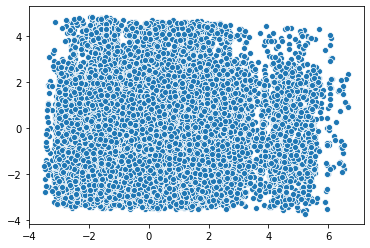

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [308]:
sns.scatterplot(X_pca[:, 0], X_pca[:, 1])

0.1109062935854487


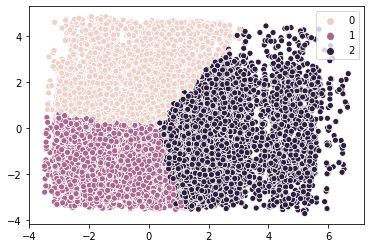

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [273]:
km = KMeans(n_clusters=3)
km.fit(X_pca)
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=km.labels_)

labels = km.fit_predict(X_pca)
print(metrics.silhouette_score(X_pca, labels, metric="euclidean"))

0.1134554015722253


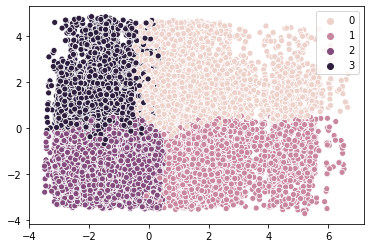

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [274]:
km = KMeans(n_clusters=4)
km.fit(X_pca)
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=km.labels_)

labels = km.fit_predict(X_pca)
print(metrics.silhouette_score(X_pca, labels, metric="euclidean"))

0.10330731798232008


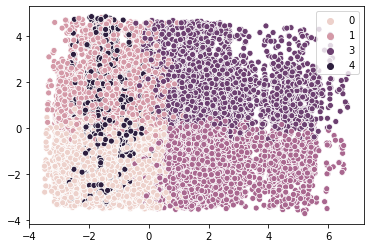

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [275]:
km = KMeans(n_clusters=5)
km.fit(X_pca)
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=km.labels_)

labels = km.fit_predict(X_pca)
print(metrics.silhouette_score(X_pca, labels, metric="euclidean"))

0.09718300526017128


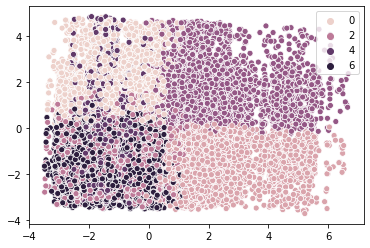

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [276]:
km = KMeans(n_clusters=6)
km.fit(X_pca)
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=km.labels_)

labels = km.fit_predict(X_pca)
print(metrics.silhouette_score(X_pca, labels, metric="euclidean"))

0.09701498311088547


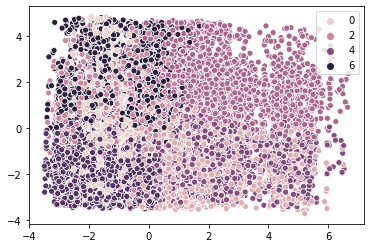

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [277]:
km = KMeans(n_clusters=7)
km.fit(X_pca)
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=km.labels_)

labels = km.fit_predict(X_pca)
print(metrics.silhouette_score(X_pca, labels, metric="euclidean"))

0.10049651844503849


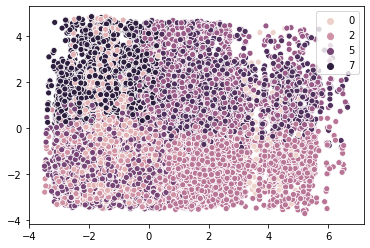

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [278]:
km = KMeans(n_clusters=8)
km.fit(X_pca)
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=km.labels_)

labels = km.fit_predict(X_pca)
print(metrics.silhouette_score(X_pca, labels, metric="euclidean"))

0.09773522694674235


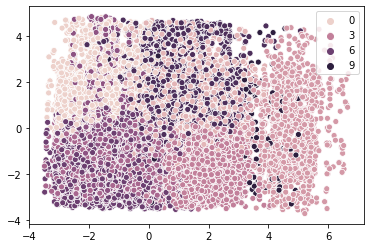

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [279]:
km = KMeans(n_clusters=9)
km.fit(X_pca)
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=km.labels_)

labels = km.fit_predict(X_pca)
print(metrics.silhouette_score(X_pca, labels, metric="euclidean"))

0.10099340040627791


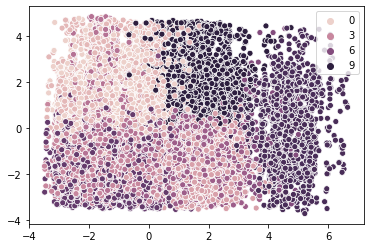

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [280]:
km = KMeans(n_clusters=10)
km.fit(X_pca)
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=km.labels_)

labels = km.fit_predict(X_pca)
print(metrics.silhouette_score(X_pca, labels, metric="euclidean"))

KMeans with PCA Silhouette Score Results:
* 3 clusters: 0.111
* 4 clusters: 0.113
* 5 clusters: 0.103
* 6 clusters: 0.097
* 7 clusters: 0.097
* 8 clusters: 0.100
* 9 clusters: 0.098
* 10 clusters: 0.101

KMeans with PCA consisting of 4 clusters has the best Silhouette Score, therefore I will be using K = 4 for my analysis.

### Analyzying KMeans with PCA

In [281]:
km = KMeans(n_clusters=4)
km.fit(X_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [282]:
# adding the cluster labels to the original dataframe
nyc["ClusterLabel"] = km.labels_

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [283]:
# creating a table of cluster means to look for any patterns
clst_means = nyc.groupby("ClusterLabel").mean()
clst_means.style.background_gradient()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [284]:
nyc["ClusterLabel"].value_counts()

3    13656
2    11124
1     9831
0     5827
Name: ClusterLabel, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [285]:
nums = nyc.select_dtypes("number")


@interact
def scatterplot(x=nums.columns, y=nums.columns, hue=nyc.columns):
    sns.scatterplot(x=x, y=y, hue=hue, data=nyc)
    plt.show()

interactive(children=(Dropdown(description='x', options=('DirectionRef', 'OriginLat', 'OriginLong', 'Destinati…

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

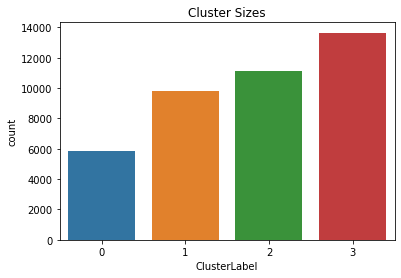

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [286]:
# Create bar chart for cluster sizes
sns.countplot(nyc["ClusterLabel"])
plt.title("Cluster Sizes")
plt.show()

In [102]:
# want to create bar charts with data plotted by each cluster

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

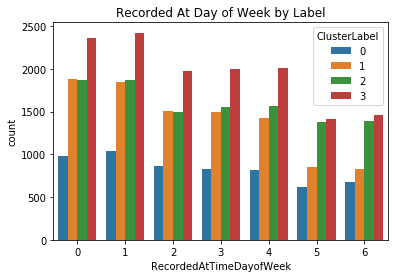

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [287]:
sns.countplot(nyc["RecordedAtTimeDayofWeek"], hue=nyc["ClusterLabel"])
plt.title("Recorded At Day of Week by Label")
plt.show()

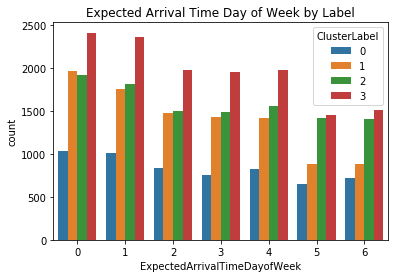

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [288]:
sns.countplot(nyc["ExpectedArrivalTimeDayofWeek"], hue=nyc["ClusterLabel"])
plt.title("Expected Arrival Time Day of Week by Label")
plt.show()

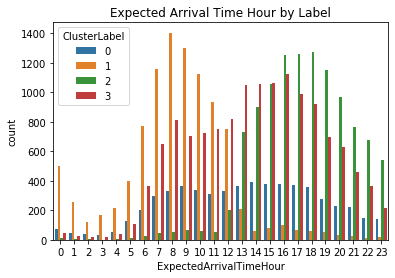

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [289]:
# it appears that Cluster 1 is more of the early morning rush hour where cluster 2 is the afternoon/evening rush hour
sns.countplot(nyc["ExpectedArrivalTimeHour"], hue=nyc["ClusterLabel"])
plt.title("Expected Arrival Time Hour by Label")
plt.show()

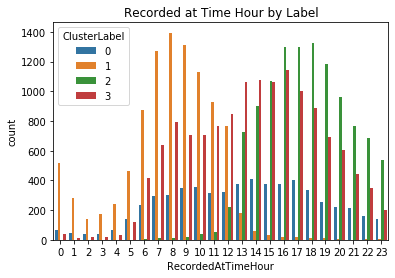

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [296]:
sns.countplot(nyc["RecordedAtTimeHour"], hue=nyc["ClusterLabel"])
plt.title("Recorded at Time Hour by Label")
plt.show()

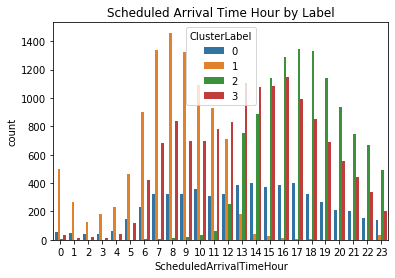

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [298]:
sns.countplot(nyc["ScheduledArrivalTimeHour"], hue=nyc["ClusterLabel"])
plt.title("Scheduled Arrival Time Hour by Label")
plt.show()

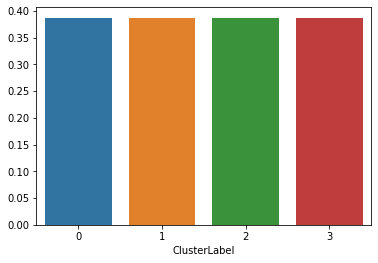

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [300]:
sns.barplot(x=nyc["ClusterLabel"], y=nyc["ArrivalProximityText"].mean())

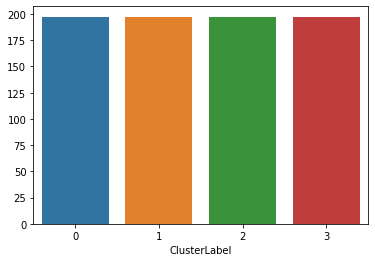

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [301]:
sns.barplot(x=nyc["ClusterLabel"], y=nyc["DistanceFromStop"].mean())

In [293]:
fig = px.scatter_geo(nyc_clust, "DestinationLat", "DestinationLong", scope="usa",)
fig.update_geos(fitbounds="locations")
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [294]:
fig = px.scatter_geo(nyc_clust, "OriginLat", "OriginLong", scope="usa",)
fig.update_geos(fitbounds="locations")
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Heirarchical Clustering with T-SNE

In [305]:
scaler = StandardScaler()
X_std = scaler.fit_transform(nyc_clust)

tsne = TSNE(n_components=2, perplexity=50)
X_tsne = tsne.fit_transform(X_std)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

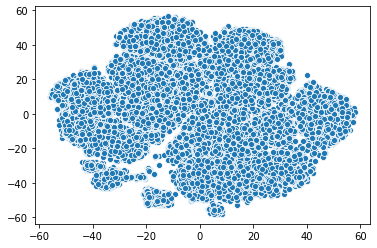

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [307]:
sns.scatterplot(X_tsne[:, 0], X_tsne[:, 1])

In [319]:
for c in range(4, 11):
    agg_clstr = AgglomerativeClustering(
        linkage="complete", affinity="cosine", n_clusters=c
    )
    clusters = agg_clstr.fit_predict(X_tsne)

    print(
        "The Silhouette Score for "
        + str(c)
        + " clusters is:"
        + str(metrics.silhouette_score(X_tsne, clusters, metric="euclidean"))
    )

The Silhouette Score for 4 clusters is:0.34098116
The Silhouette Score for 5 clusters is:0.3231375
The Silhouette Score for 6 clusters is:0.31394175
The Silhouette Score for 7 clusters is:0.31161374
The Silhouette Score for 8 clusters is:0.28103745
The Silhouette Score for 9 clusters is:0.27042896
The Silhouette Score for 10 clusters is:0.24835835


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [320]:
for c in range(4, 11):
    agg_clstr = AgglomerativeClustering(
        linkage="average", affinity="cosine", n_clusters=c
    )
    clusters = agg_clstr.fit_predict(X_tsne)

    print(
        "The Silhouette Score for "
        + str(c)
        + " clusters is:"
        + str(metrics.silhouette_score(X_tsne, clusters, metric="euclidean"))
    )

The Silhouette Score for 4 clusters is:0.36497253
The Silhouette Score for 5 clusters is:0.36105525
The Silhouette Score for 6 clusters is:0.3457568
The Silhouette Score for 7 clusters is:0.34097618
The Silhouette Score for 8 clusters is:0.31412613
The Silhouette Score for 9 clusters is:0.2860128
The Silhouette Score for 10 clusters is:0.26588684


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [321]:
for c in range(4, 11):
    agg_clstr = AgglomerativeClustering(
        linkage="ward", affinity="euclidean", n_clusters=c
    )
    clusters = agg_clstr.fit_predict(X_tsne)

    print(
        "The Silhouette Score for "
        + str(c)
        + " clusters is:"
        + str(metrics.silhouette_score(X_tsne, clusters, metric="euclidean"))
    )

The Silhouette Score for 4 clusters is:0.3322936
The Silhouette Score for 5 clusters is:0.32541662
The Silhouette Score for 6 clusters is:0.3233333
The Silhouette Score for 7 clusters is:0.34102675
The Silhouette Score for 8 clusters is:0.34546298
The Silhouette Score for 9 clusters is:0.35486045
The Silhouette Score for 10 clusters is:0.36935854


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Silhouette Score for Agglomerative Clustering with complete linkage:
* 4 clusters is: 0.34098116
* 5 clusters is: 0.3231375
* 6 clusters is: 0.31394175
* 7 clusters is: 0.31161374
* 8 clusters is: 0.28103745
* 9 clusters is: 0.27042896
* 10 clusters is: 0.24835835

Silhouette Score for Agglomerative Clustering with average linkage:
* 4 clusters is: 0.36497253
* 5 clusters is: 0.36105525
* 6 clusters is: 0.3457568
* 7 clusters is: 0.34097618
* 8 clusters is: 0.31412613
* 9 clusters is: 0.2860128
* 10 clusters is: 0.26588684

Silhouette Score for Agglomerative Clustering with ward linkage:
* 4 clusters is: 0.3322936
* 5 clusters is: 0.32541662
* 6 clusters is: 0.3233333
* 7 clusters is: 0.34102675
* 8 clusters is: 0.34546298
* 9 clusters is: 0.35486045
* 10 clusters is: 0.36935854

The best Silhouette score comes from Agglomerative Clustering with 10 clusters and ward linkage.

### Analyzying Agglomerative Clustering with t-SNE

The Silhouette Score for 10 clusters is:0.36935854


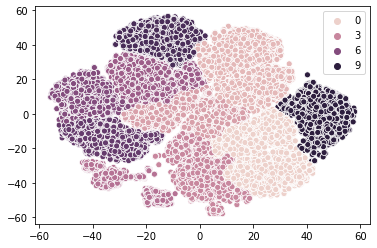

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [322]:
agg_clstr = AgglomerativeClustering(linkage="ward", affinity="euclidean", n_clusters=10)
clusters = agg_clstr.fit_predict(X_tsne)
sns.scatterplot(X_tsne[:, 0], X_tsne[:, 1], hue=agg_clstr.labels_)
print(
    "The Silhouette Score for "
    + str(10)
    + " clusters is:"
    + str(metrics.silhouette_score(X_tsne, clusters, metric="euclidean"))
)

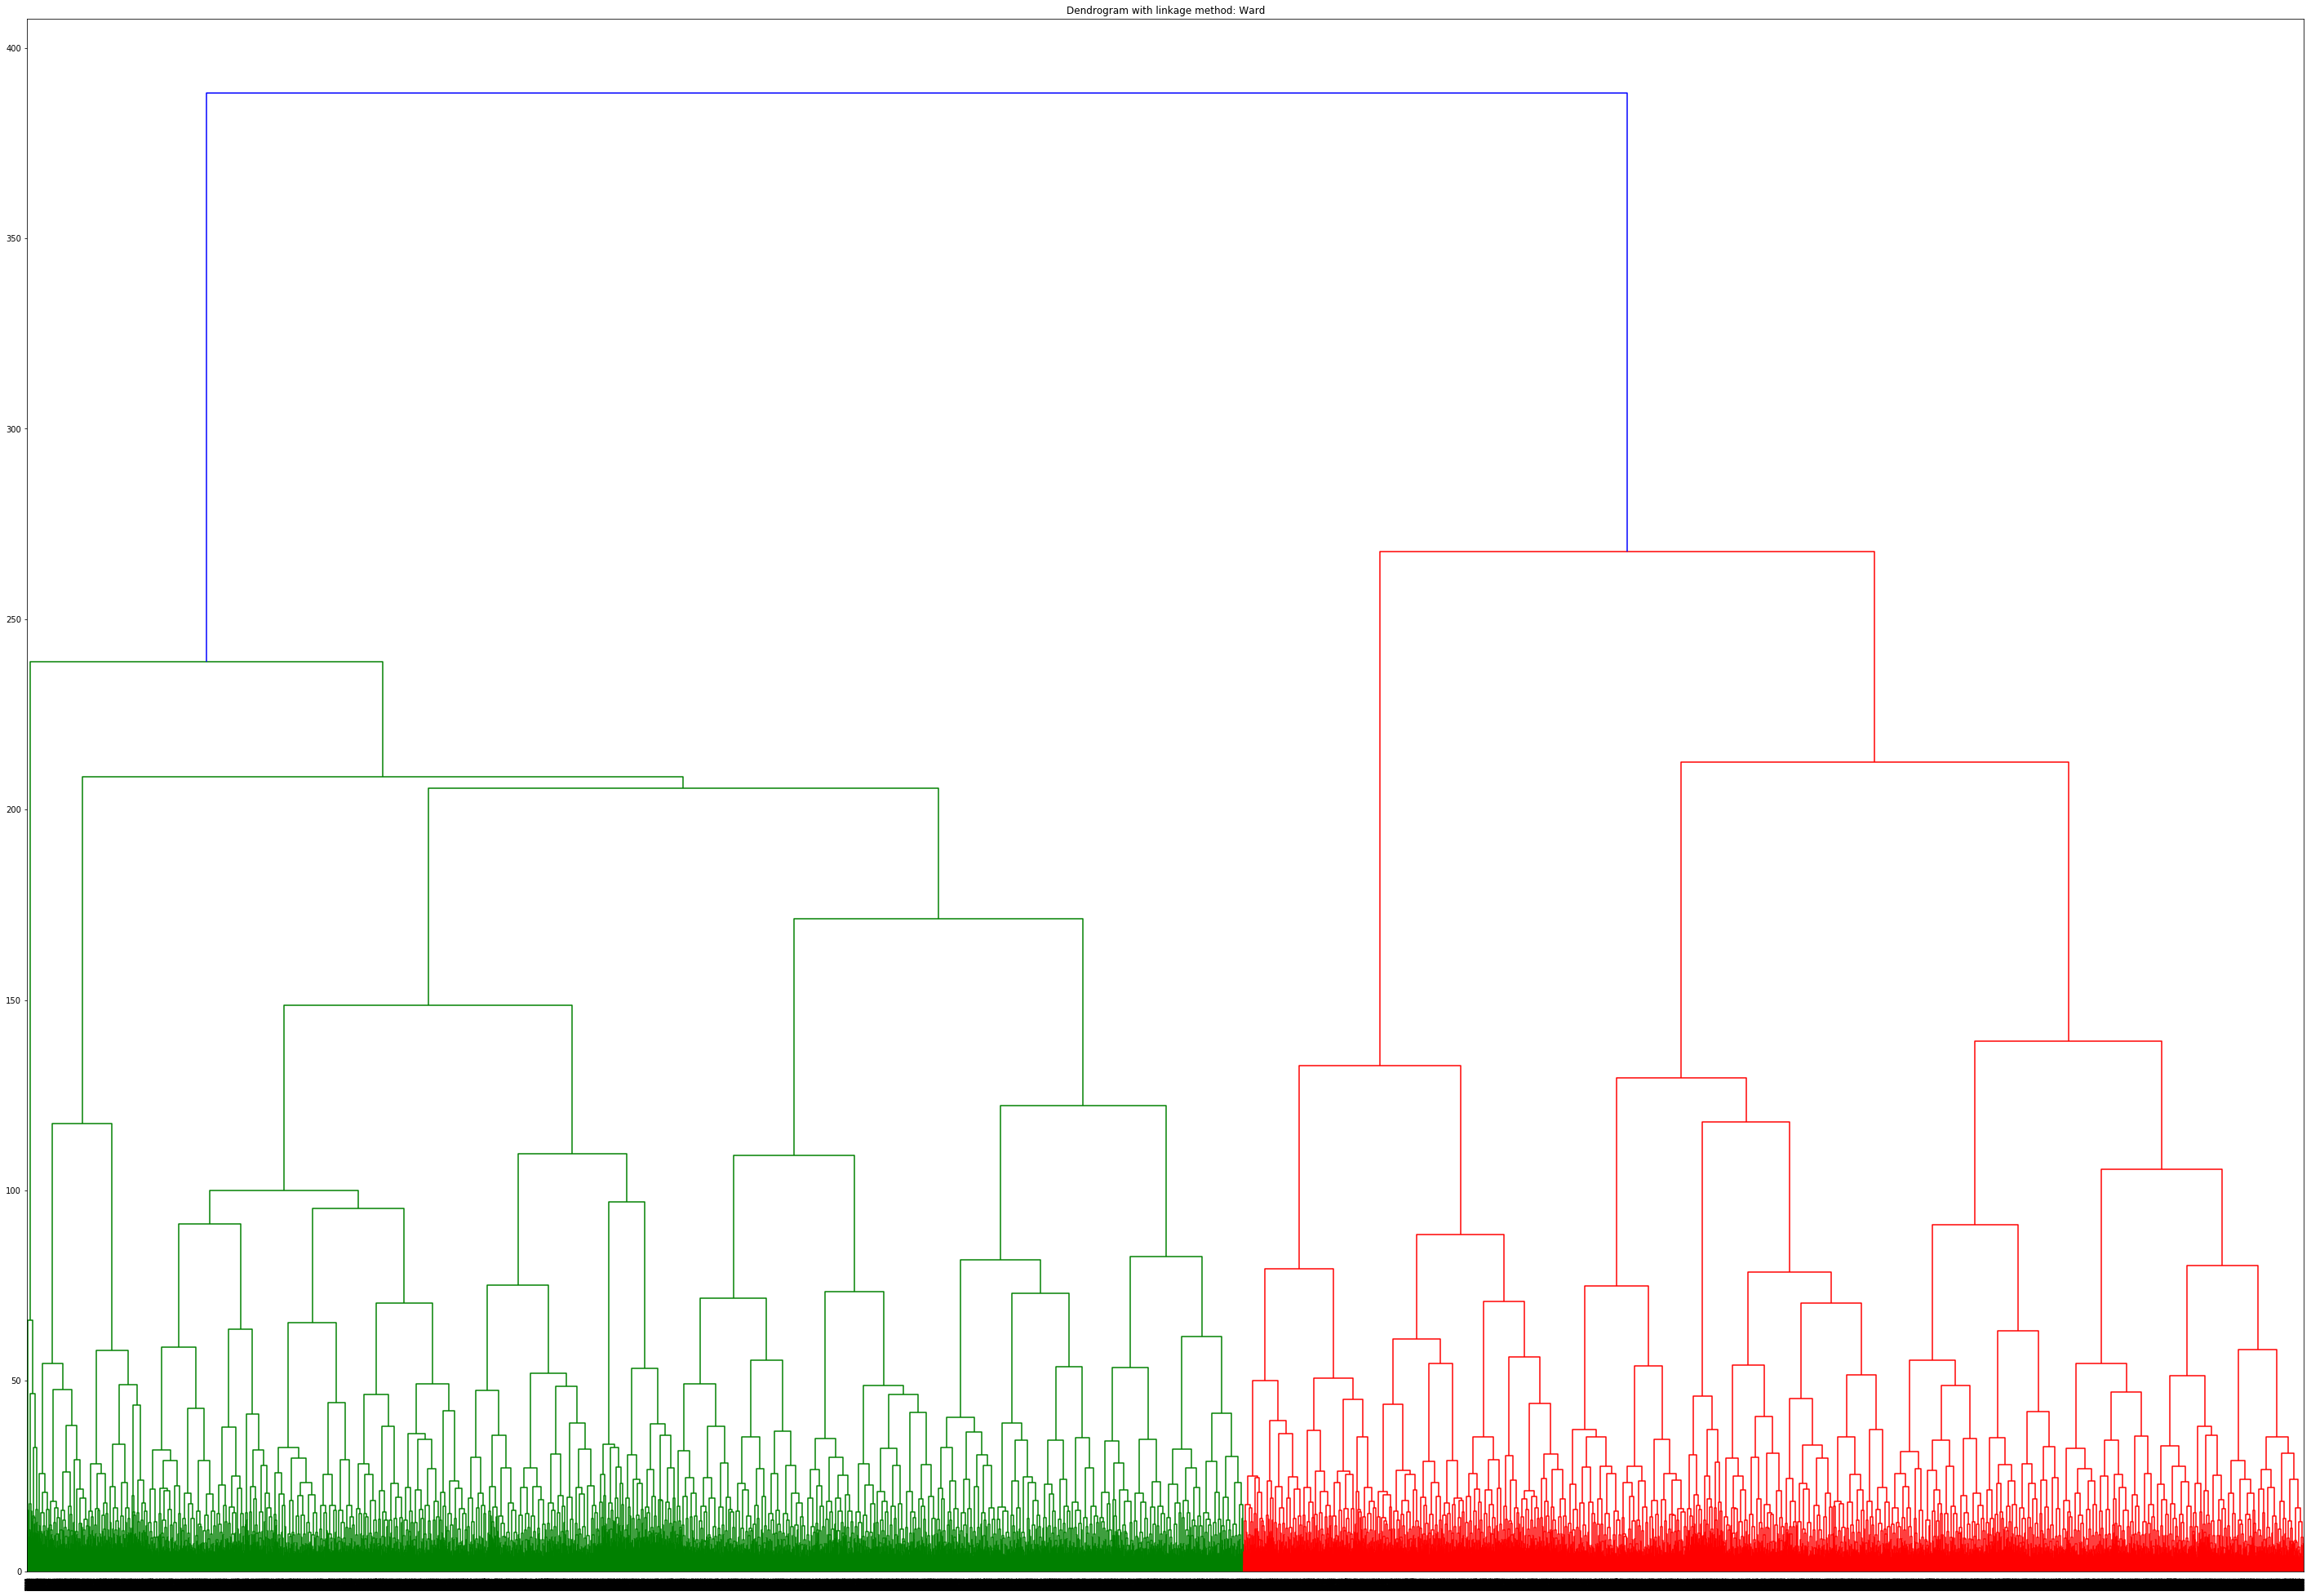

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [323]:
plt.figure(figsize=(50, 35))
plt.title("Dendrogram with linkage method: Ward")
dendrogram(linkage(X_std, method="ward"))
plt.show()

In [324]:
nyc["ClusterLabel"] = agg_clstr.labels_
clst_means = nyc.groupby("ClusterLabel").mean()
clst_means.style.background_gradient()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [325]:
nyc["ClusterLabel"].value_counts()

0    6644
1    6078
3    4335
5    4217
2    3804
9    3690
8    3492
7    3357
6    2858
4    1963
Name: ClusterLabel, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

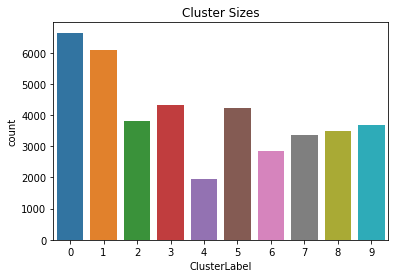

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [327]:
# Create bar chart for cluster sizes
sns.countplot(nyc["ClusterLabel"])
plt.title("Cluster Sizes")
plt.show()

In [328]:
nums = nyc.select_dtypes("number")


@interact
def scatterplot(x=nums.columns, y=nums.columns, hue=nyc.columns):
    sns.scatterplot(x=x, y=y, hue=hue, data=nyc)
    plt.show()

interactive(children=(Dropdown(description='x', options=('DirectionRef', 'OriginLat', 'OriginLong', 'Destinati…

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

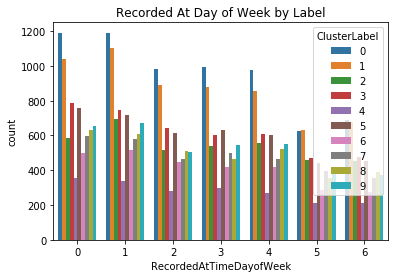

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [329]:
sns.countplot(nyc["RecordedAtTimeDayofWeek"], hue=nyc["ClusterLabel"])
plt.title("Recorded At Day of Week by Label")
plt.show()

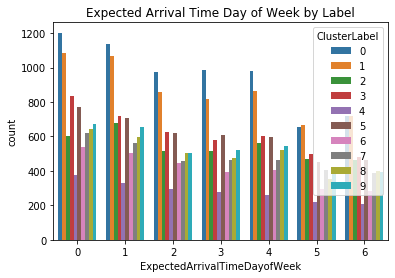

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [330]:
sns.countplot(nyc["ExpectedArrivalTimeDayofWeek"], hue=nyc["ClusterLabel"])
plt.title("Expected Arrival Time Day of Week by Label")
plt.show()

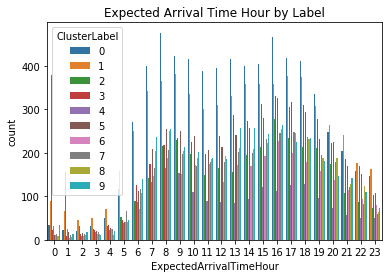

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [336]:
#want to increase figure size to emphasize clusters
sns.countplot(nyc["ExpectedArrivalTimeHour"], hue=nyc["ClusterLabel"])
plt.title("Expected Arrival Time Hour by Label")
plt.show()

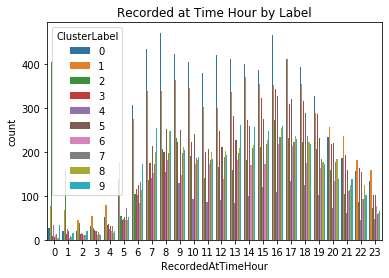

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [337]:
sns.countplot(nyc["RecordedAtTimeHour"], hue=nyc["ClusterLabel"])
plt.title("Recorded at Time Hour by Label")
plt.show()

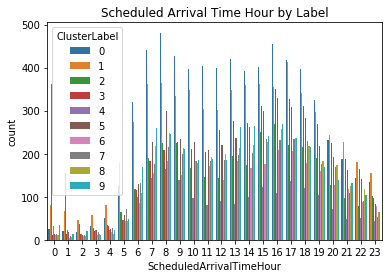

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [345]:
sns.countplot(
    nyc["ScheduledArrivalTimeHour"], hue=nyc["ClusterLabel"],
)
plt.title("Scheduled Arrival Time Hour by Label")
plt.show()

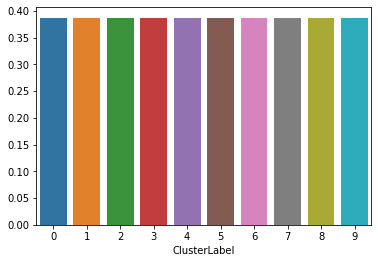

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [339]:
sns.barplot(x=nyc["ClusterLabel"], y=nyc["ArrivalProximityText"].mean())

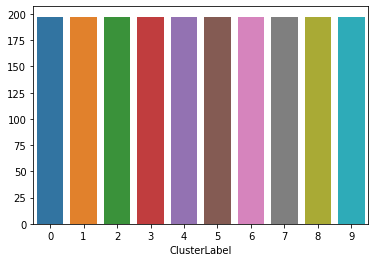

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [340]:
sns.barplot(x=nyc["ClusterLabel"], y=nyc["DistanceFromStop"].mean())